In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("survey_results_public.csv")

In [19]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [20]:
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [21]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [22]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [23]:
print(df['Employment'].unique())

['Employed full-time' 'I prefer not to say'
 'Independent contractor, freelancer, or self-employed'
 'Employed part-time' 'Retired']


In [24]:
df=df[df["Employment"]=="Employed full-time"]
df=df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [25]:
df["Country"].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [26]:
def CutCountry(categories, minimum):
    NewCountry = {}
    for i in range(len(categories)):
        if categories.values[i] >= minimum:
            NewCountry[categories.index[i]] = categories.index[i]
        else:
            NewCountry[categories.index[i]] = 'Other'
    return NewCountry

In [27]:
CuttedCountry = CutCountry(df.Country.value_counts(),500)
df['Country'] = df['Country'].map(CuttedCountry)
df.Country.value_counts()

Other                                                   12448
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Name: Country, dtype: int64

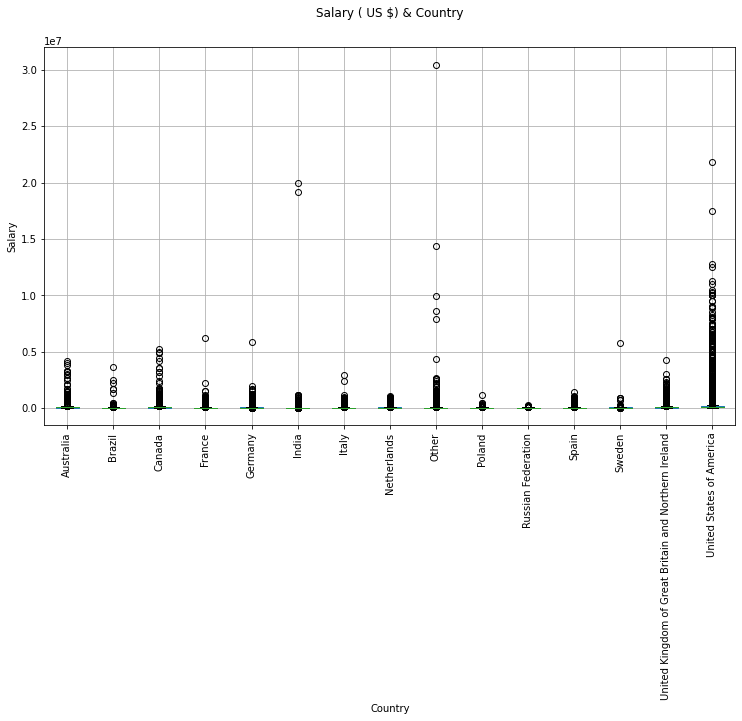

In [28]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary ( US $) & Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [29]:
df = df[df["Salary"] <= 300000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Other"]

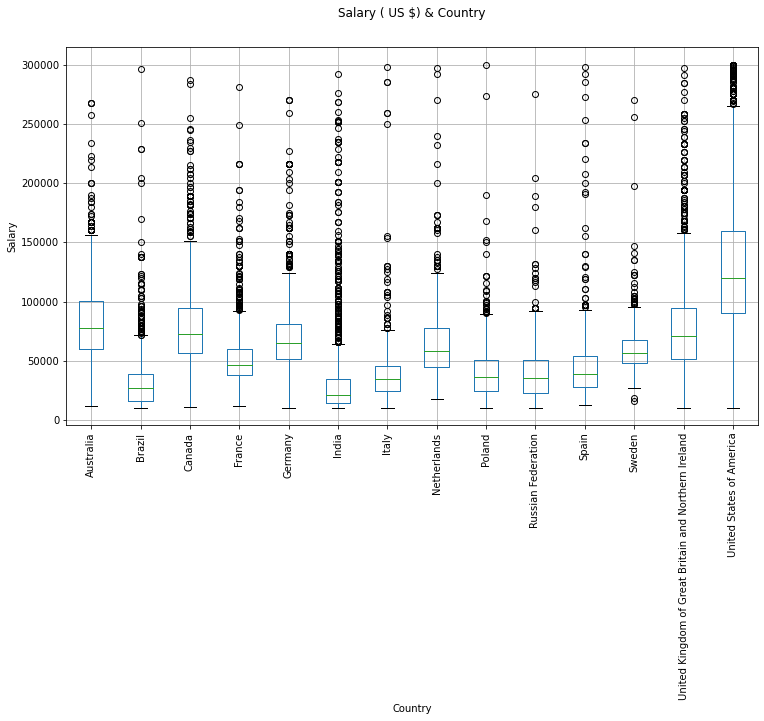

In [30]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary ( US $) & Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [31]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]

In [32]:
#Australia
Australia = df[ (df['Salary'] >= 146000) & (df["Country"] == "Australia") ].index
df.drop(Australia, inplace = True) 

In [33]:
#Brazil
Brazil = df[ (df['Salary'] >= 58000) & (df["Country"] == "Brazil") ].index
df.drop(Brazil, inplace = True)

In [34]:
#Canada
Canada = df[ (df['Salary'] >= 147000) & (df["Country"] == "Canada") ].index
df.drop(Canada, inplace = True) 

In [35]:
#France
France = df[ (df['Salary'] >= 88000) & (df["Country"] == "France") ].index
df.drop(France, inplace = True) 

In [36]:
#Germany
GermanyTop = df[ (df['Salary'] >= 116000) & (df["Country"] == "Germany") ].index
df.drop(GermanyTop, inplace = True)
GermanyBot = df[ (df['Salary'] <= 20000) & (df["Country"] == "Germany") ].index
df.drop(GermanyBot, inplace = True)

In [37]:
#India
India = df[ (df['Salary'] >= 47000) & (df["Country"] == "India") ].index
df.drop(India, inplace = True)

In [38]:
#Italy
Italy = df[ (df['Salary'] >= 70000) & (df["Country"] == "Italy") ].index
df.drop(Italy, inplace = True) 

In [39]:
#Netherlands
Netherlands = df[ (df['Salary'] >= 120000) & (df["Country"] == "Netherlands") ].index
df.drop(Netherlands, inplace = True) 

In [40]:
#Poland
Poland = df[ (df['Salary'] >= 80000) & (df["Country"] == "Poland") ].index
df.drop(Poland, inplace = True) 

In [41]:
#Russian Federation
RussianFed = df[ (df['Salary'] >= 86000) & (df["Country"] == "Russian Federation") ].index
df.drop(RussianFed, inplace = True) 

In [42]:
#Spain
Spain = df[ (df['Salary'] >= 84000) & (df["Country"] == "Spain") ].index
df.drop(Spain, inplace = True) 

In [43]:
#Sweden
SwedenTop = df[ (df['Salary'] >= 90000) & (df["Country"] == "Sweden") ].index
df.drop(SwedenTop, inplace = True) 
SwedenBot = df[ (df['Salary'] <= 20000) & (df["Country"] == "Sweden") ].index
df.drop(SwedenBot, inplace = True) 

In [44]:
#United Kingdom
UK = df[ (df['Salary'] >= 149000) & (df["Country"] == "United Kingdom of Great Britain and Northern Ireland") ].index
df.drop(UK, inplace = True)

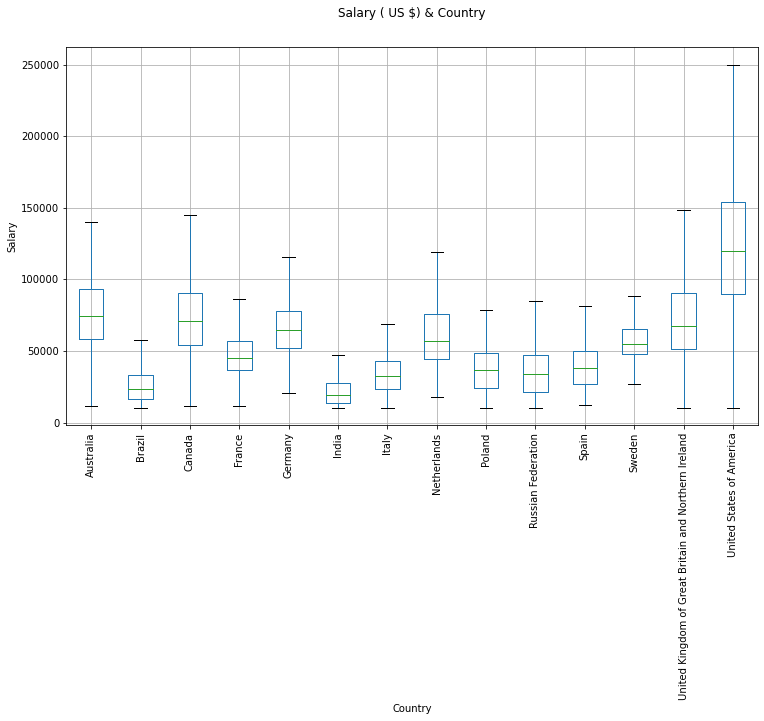

In [45]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary ( US $) & Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [46]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '12', '15', '8', '17', '1', '14', '34', '11', '25', '24',
       '22', '13', '9', '26', '7', '39', '20', '27', '30', '19', '35',
       '33', '37', '23', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [47]:
def StF(x):
    if x == "More than 50 years":
        return 51
    if x == "Less than 1 year":
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(StF)

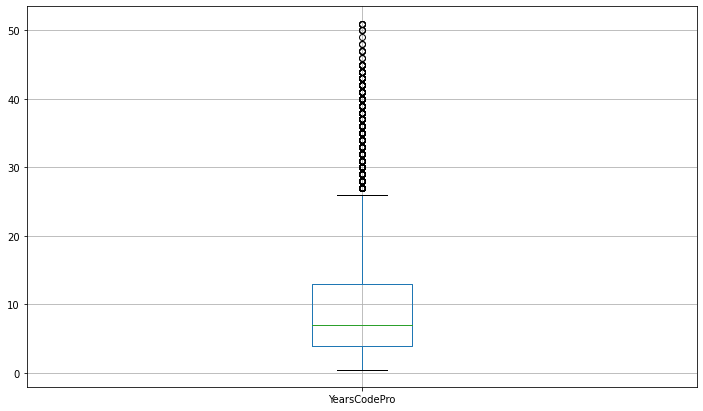

In [48]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot("YearsCodePro")
plt.show()

In [49]:
#Dropping outlier in Experience
df = df[df["YearsCodePro"] <= 25]

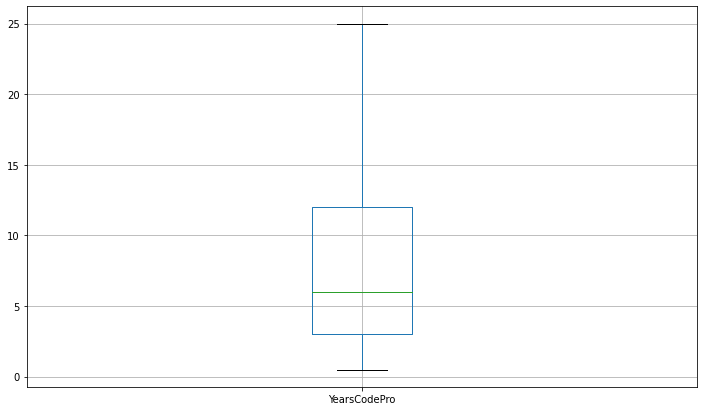

In [50]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot("YearsCodePro")
plt.show()

In [51]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [52]:
def CombineEdLevel(x):
    if "Bachelor" in x:
        return "Bachelor's degree"
    if "Master" in x:
        return "Master's degree"
    if "Professional" in x or "Other doctoral" in x:
        return "Professional or Doctoral Degree"
    return "Less than a Bachelor"

df["EdLevel"] = df["EdLevel"].apply(CombineEdLevel)

In [53]:
df["EdLevel"].unique()

array(["Master's degree", "Bachelor's degree",
       'Professional or Doctoral Degree', 'Less than a Bachelor'],
      dtype=object)

In [54]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
9,Sweden,Master's degree,4.0,51552.0
11,Spain,Bachelor's degree,5.0,46482.0
12,Germany,Master's degree,6.0,77290.0
17,Canada,Bachelor's degree,6.0,46135.0
23,France,Master's degree,2.0,38915.0


In [55]:
df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'France',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'United States of America', 'Italy',
       'Netherlands', 'Poland', 'Australia', 'India', 'Brazil'],
      dtype=object)

In [56]:
from sklearn.preprocessing import LabelEncoder
EdLevel_LE = LabelEncoder()
df["EdLevel"] = EdLevel_LE.fit_transform(df.EdLevel.values)
df["EdLevel"].unique()

array([2, 0, 3, 1])

In [57]:
Country_LE = LabelEncoder()
df["Country"] = Country_LE.fit_transform(df.Country.values)
df["Country"].unique()

array([11, 10,  4,  2,  3, 12,  9, 13,  6,  7,  8,  0,  5,  1])

In [58]:
x = df.drop("Salary", axis=1)
y = df["Salary"]

In [59]:
x

,Country,EdLevel,YearsCodePro
9,11,2,4.0
11,10,0,5.0
12,4,2,6.0
17,2,0,6.0
23,3,2,2.0
...,...,...,...
83430,13,2,21.0
83432,2,0,0.5
83434,13,0,5.0
83436,13,1,4.0


In [60]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [61]:
xTrain

,Country,EdLevel,YearsCodePro
73969,13,0,6.0
30487,0,1,17.0
10852,13,2,10.0
26721,5,0,10.0
14976,11,1,2.0
...,...,...,...
49668,7,3,4.0
72206,2,0,8.0
35552,13,2,5.0
40069,5,0,4.0


In [62]:
xTest

,Country,EdLevel,YearsCodePro
44445,13,0,10.0
19255,13,2,6.0
52019,12,0,24.0
59346,13,2,3.0
57324,5,0,1.0
...,...,...,...
68973,2,0,3.0
17309,13,0,24.0
3963,8,3,10.0
56406,13,0,9.0


In [63]:
yTrain

73969    168000.0
30487     66810.0
10852    100000.0
26721     36864.0
14976     42960.0
           ...   
49668     56816.0
72206     61640.0
35552     80000.0
40069     22339.0
9031      58167.0
Name: Salary, Length: 17858, dtype: float64

In [64]:
yTest

44445    135000.0
19255    250000.0
52019     72385.0
59346     91500.0
57324     10896.0
           ...   
68973     38572.0
17309    150000.0
3963      13968.0
56406    140000.0
57928     23088.0
Name: Salary, Length: 4465, dtype: float64

In [65]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(xTrain, yTrain.values)

LinearRegression()

In [66]:
y_pred = LR.predict(xTest)
x_pred = LR.predict(xTrain)

In [67]:
y_pred

array([106486.56847574,  94794.85665104, 133225.11541074, ...,
        75470.61503886, 104187.01971988,  50957.01925514])

In [68]:
x_pred

array([ 97288.37345231,  50419.88795516, 103993.05167447, ...,
        92495.30789519,  49048.19076464,  89533.68904946])

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
err = np.sqrt(mean_squared_error(yTest,y_pred))

In [70]:
err

39425.09970503865

In [74]:
mean_absolute_error(yTest,y_pred)

19890.971837503792

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

MD = [None, 2, 4, 6, 8, 10]
parameters = {"max_depth": MD}

regressor = DecisionTreeRegressor(random_state=0)
GS = GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
GS.fit(xTrain, yTrain.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [72]:
regressor = GS.best_estimator_
regressor.fit(xTrain, yTrain.values)
y_pred = regressor.predict(xTest)
err = np.sqrt(mean_squared_error(yTest,y_pred))
print("${:,.02f}".format(err))

$28,833.56


In [73]:
test = pd.DataFrame({"Actual": yTest, "Predicted": y_pred})
test

,Actual,Predicted
44445,135000.0,132336.692182
19255,250000.0,127714.517241
52019,72385.0,87513.775194
59346,91500.0,113414.034884
57324,10896.0,17226.354545
...,...,...
68973,38572.0,64006.835443
17309,150000.0,149652.538667
3963,13968.0,45063.760252
56406,140000.0,132336.692182


In [57]:
regressor.score(xTest,yTest)

0.6621494301403663

In [58]:
x = np.array([["Italy","Master's degree", 20]])
x

array([['Italy', "Master's degree", '20']], dtype='<U15')

In [59]:
x[:,0] = Country_LE.transform(x[:,0])
x[:,1] = EdLevel_LE.transform(x[:,1])
x = x.astype(float)
x

array([[ 6.,  2., 20.]])

In [60]:
y_pred = regressor.predict(x)
y_pred

array([49774.63157895])

In [61]:
import pickle

In [62]:
data = {"model": regressor, "Country_LE":Country_LE, "EdLevel_LE":EdLevel_LE}
with open("SavedModel.pkl","wb") as file:
    pickle.dump(data, file)

In [63]:
with open("SavedModel.pkl", "rb") as file:
    data = pickle.load(file)
    
LoadedRegressor = data["model"]
CountryEncoder = data["Country_LE"]
EdLevelEncoder = data["EdLevel_LE"]

In [64]:
y_pred = LoadedRegressor.predict(x)
y_pred

array([49774.63157895])

In [65]:
import session_info

session_info.show()